In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [25]:
col_names = ['ukuran', 'lantai', 'tarif_internet', 'tipe_bangunan', 'harga_sewa', 'kategori']
# load dataset
pima = pd.read_excel("Datagedung.xlsx", header=None, names=col_names)

In [26]:
pima

,ukuran,lantai,tarif_internet,tipe_bangunan,harga_sewa,kategori
0,510,4,8,C,320,Biasa
1,550,7,50,A,385,Biasa
2,620,9,7,C,400,VIP
3,630,5,24,B,392,Biasa
4,655,8,100,A,380,Biasa
5,700,4,8,C,410,VIP
6,780,10,7,C,480,VIP
7,800,12,50,A,600,Eksklusif
8,920,14,8,C,570,Eksklusif
9,1000,9,24,B,620,Eksklusif


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
pima.tipe_bangunan = le.fit_transform(pima.tipe_bangunan)
pima.kategori = le.fit_transform(pima.kategori)
pima

,ukuran,lantai,tarif_internet,tipe_bangunan,harga_sewa,kategori
0,510,4,8,2,320,0
1,550,7,50,0,385,0
2,620,9,7,2,400,2
3,630,5,24,1,392,0
4,655,8,100,0,380,0
5,700,4,8,2,410,2
6,780,10,7,2,480,2
7,800,12,50,0,600,1
8,920,14,8,2,570,1
9,1000,9,24,1,620,1


In [34]:
#split dataset in features and target variable
feature_cols = ['ukuran', 'lantai', 'tarif_internet', 'tipe_bangunan', 'harga_sewa']
X = pima[feature_cols] # Features
y = pima.kategori # Target variable


In [35]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [49]:
X_test

,ukuran,lantai,tarif_internet,tipe_bangunan,harga_sewa
2,620,9,7,2,400
9,1000,9,24,1,620
6,780,10,7,2,480


In [57]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [58]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


In [59]:
from sklearn import tree
from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'ukuran <= 677.5\nentropy = 1.379\nsamples = 7\nvalue = [4, 2, 1]\nclass = Biasa'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0, 0]\nclass = Biasa'),
 Text(0.6, 0.5, 'harga_sewa <= 490.0\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]\nclass = Eksklusif'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = VIP'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = Eksklusif')]

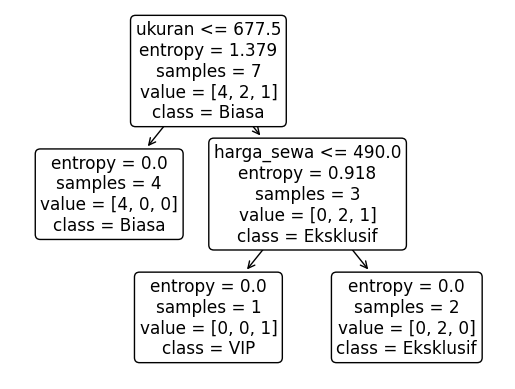

In [60]:
tree.plot_tree(clf, class_names=['Biasa','Eksklusif','VIP'], feature_names=feature_cols, filled=None, rounded=True)

In [61]:
col_names2 = ['ukuran', 'lantai', 'tarif_internet', 'tipe_bangunan', 'harga_sewa']
# load dataset
pima2 = pd.read_excel("Datagedungbaru.xlsx", header=None, names=col_names2)

In [62]:
pima2

,ukuran,lantai,tarif_internet,tipe_bangunan,harga_sewa
0,510,4,8,B,392
1,550,7,100,A,385


In [63]:
pima2.tipe_bangunan = le.fit_transform(pima2.tipe_bangunan)
pima2

,ukuran,lantai,tarif_internet,tipe_bangunan,harga_sewa
0,510,4,8,1,392
1,550,7,100,0,385


In [64]:
pima2_predict = clf.predict(pima2)
pima2_predict

array([0, 0])